### Basics of inference

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run SecondAssignmentHandsOn_Helper.ipynb
%run SecondAssignmentHandsOn_Plot.ipynb
import numpy as np

In [2]:
sample = np.random.randint(18,45,50)
print(sample)

sample.mean()

[28 24 38 42 38 29 38 24 23 38 36 44 33 36 26 28 42 22 33 26 18 39 24 36
 18 39 21 23 43 37 20 36 19 39 35 42 23 41 42 31 22 39 38 35 31 29 33 31
 23 22]


31.54

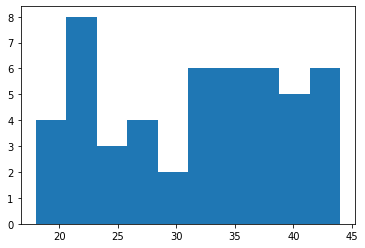

In [3]:
import matplotlib.pyplot as plt

plt.hist(sample)

plt.show()

In [4]:
from statsmodels.stats.weightstats import ztest
# statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

ztest(sample, value = 28)

# H0: mu = 28
# H1: mu != 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

(3.205276408652401, 0.0013493283508686804)

In [5]:
ztest(sample, value = 28, alternative="larger")

# H0: mu = 28
# H1: mu > 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

(3.205276408652401, 0.0006746641754343402)

If I have a p-value lower than 0.05, I would say:
- I have enough evidence to reject H0, there fore, I assume H1 with a confidence of 95%

If the p-value is larger than 0.05:
- I don't have enough evidence to reject H0, so we accept is true with a confidence of 95%

# Assignment II

Second graded assignment of the course. There is not only one way to do some of the sections. Feel free to add some extra sections if you consider them interesting!

1. Generate a list/array with the height of the population of Barcelona (1620343 inhab), where the mean is 173 cm and the standard deviation is 9.5 cm. Height is normally distributed.

In [6]:
barcelona_h_mean = 173
barcelona_h_std = 9.5
barcelona_h_size = 1620343
barcelona_h = np.random.normal(loc=barcelona_h_mean, scale=barcelona_h_std, size=barcelona_h_size)
stats.describe(barcelona_h)

DescribeResult(nobs=1620343, minmax=(124.8991185399608, 219.25115814755188), mean=173.00581085747993, variance=90.20823669532261, skewness=-0.0007549099901088855, kurtosis=-0.001106871424153777)

2. Plot the distribution of the population (not the mean)

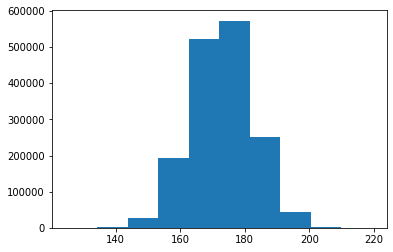

In [7]:
plt.hist(barcelona_h)

plt.show()

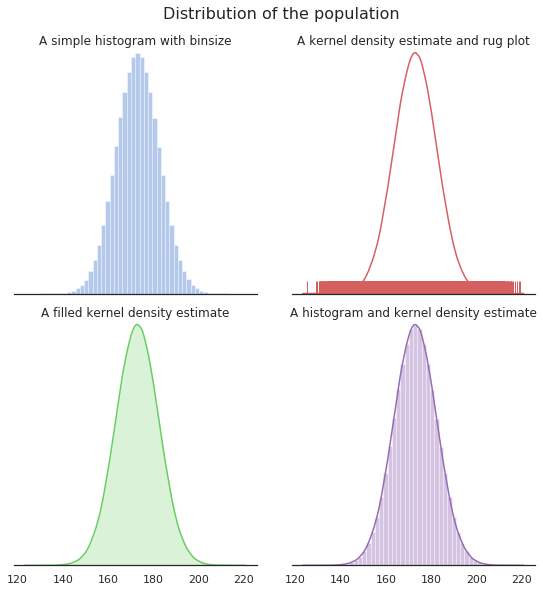

In [8]:
p_suptitle = "Distribution of the population"
#p_data = pd.DataFrame(data=barcelona_h, index=["idx"], columns=["height"])
df_barcelona_h = pd.DataFrame(data=barcelona_h, columns=["height"])
#p_data.head(5)
sns_distplot_4_subplots(df_barcelona_h, p_suptitle)

3. How many cases are considered outliers? (we can use the definition of being above/below 1.5 x IQR, or 3 x IQR if we want to be more restrictive)

<img src="https://naysan.ca/wp-content/uploads/2020/06/box_plot_ref_needed.png" alt="Girl in a jacket" width="500" height="600">

<p align="left" style="font-size:16px"><b> Calcuating Percentile by hand </b></p>

In [9]:
#Calcuating Percentile by hand
Q1 = get_percentile(df_barcelona_h,'height',25)
Q3 = get_percentile(df_barcelona_h,'height',75)
IQR = Q3 - Q1

print("Q1 --> {0}".format(Q1))
print("Q3 --> {0}".format(Q3))
print("IQR --> {0}".format(IQR))

Q1 --> 166.59232106838857
Q3 --> 179.41678817947266
IQR --> 12.82446711108409


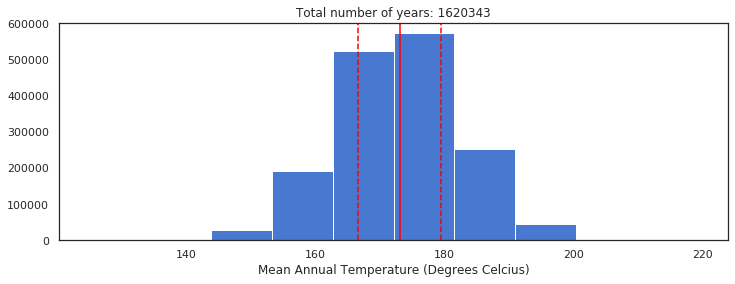

In [10]:
plt.figure(figsize=(12,4))
plt.hist(df_barcelona_h['height'])
plt.title("Total number of years: %s" % len(df_barcelona_h.index))
plt.xlabel("Mean Annual Temperature (Degrees Celcius)")
# Vertical lines for each percentile of interest
plt.axvline(Q1, linestyle='--', color='red')
plt.axvline(get_percentile(df_barcelona_h,'height',50), linestyle='-',  color='red')
plt.axvline(Q3, linestyle='--', color='red')
plt.show()

<p align="left" style="font-size:16px"><b> Using scipy.stats </b></p>

In [11]:
#Using scipy.stats
iqr(df_barcelona_h['height'])

12.8244878261157

<p align="left" style="font-size:16px"><b> Using pandas to calculate IQR </b></p>

In [12]:
df_barcelona_h.describe()

,height
count,1.620343e+06
mean,1.730058e+02
std,9.497802e+00
min,1.248991e+02
25%,1.665923e+02
50%,1.730069e+02
75%,1.794168e+02
max,2.192512e+02


In [13]:
# Computing IQR = Q3 – Q1.
Q1 = df_barcelona_h['height'].quantile(0.25)
Q3 = df_barcelona_h['height'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 --> {0}".format(Q1))
print("Q3 --> {0}".format(Q3))
print("IQR --> {0}".format(IQR))

Q1 --> 166.59232726070178
Q3 --> 179.41681508681748
IQR --> 12.8244878261157


In [14]:
min_threshold_IQR = Q1 - (1.5 * IQR)
max_threshold_IQR = Q3 + (1.5 * IQR)
print("min_threshold_IQR --> {0}".format(min_threshold_IQR))
print("max_threshold_IQR --> {0}".format(max_threshold_IQR))

min_threshold_IQR --> 147.35559552152824
max_threshold_IQR --> 198.65354682599104


In [15]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df_barcelona_h.query('@min_threshold_IQR <= height <= @max_threshold_IQR')
print("Rows inside Interquartile Range rule--> {0}".format(filtered.size))

Rows inside Interquartile Range rule--> 1609002


In [16]:
filtered.sort_values(by="height", ascending=False).reset_index().head(3)

,index,height
0,129880,198.652695
1,391897,198.651580
2,1148344,198.651425


In [17]:
filtered.sort_values(by="height", ascending=False).reset_index().tail(3)

,index,height
1608999,612464,147.357387
1609000,1401293,147.356393
1609001,495853,147.355739


In [18]:
# Filtering outliers
filtered_outliers = df_barcelona_h[(df_barcelona_h['height'] <= min_threshold_IQR) | (df_barcelona_h['height'] >= max_threshold_IQR) ]
print("Rows outside Interquartile Range rule (outliers)--> {0}".format(filtered_outliers.size))

Rows outside Interquartile Range rule (outliers)--> 11341


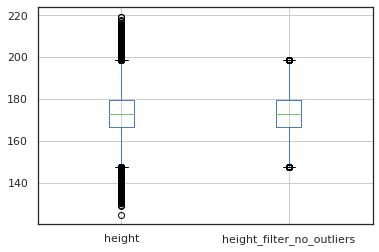

In [19]:
# Ploting the result to check the difference
df_barcelona_h.join(filtered, rsuffix='_filter_no_outliers').boxplot()

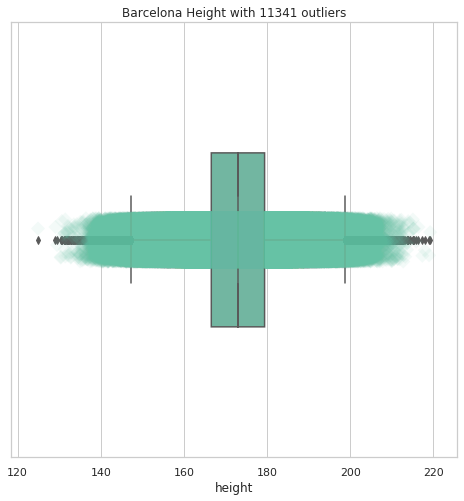

In [20]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
p = sns.boxplot(x="height", data=df_barcelona_h, showfliers = True, notch= True, width= 0.4, palette="Set2")
p = sns.stripplot(x="height", data=df_barcelona_h, color=".25", alpha=.075,  palette="Set2", orient = 'h', jitter=0.05, size=10, marker="D")
str_title =  "Barcelona Height with {0} outliers".format(filtered_outliers.size)
plt.title(str_title)
plt.show()

4. Generate a sample of 50 individuals, and using the Z-test, test $H_0 = 173$ against $H_1 \neq 173$. Use a confidence of 90%, 95%, 95.5% and 99%. Do you get different conclusions?

Remember: Confidence (and significance) are arbitrary values!! You use them as a threshold, but you never see them in the functions! Is what you use to decide if the values are extreme enough given some amount of risk

4.1 Draw the Z-test for the population mean

4.2 Does it change a lot if we test $H_0 = 173$ against $H_1 > 173$ ? Explain the differences

5. Now we are going to generate 10000 samples of 50 individuals. For each of them, I want to apply the previous procedure, Z-test with 90, 95, 95.5 and 99% confidence! At the end, I want to see how many times I accepted $H_0$ and how many times I rejected it (which means I assume $H_1$ is happening) for each of them. Does it fit what we should expect?

Show it graphically

6.  Replicate the previous point, testing $H_0 = 180$ against $H_1 \neq 180$. How many times have you accepted $H_0$? Can you link these results with the errors of type I and II?

(Extra) 7. Test if the amount of outliers you have affects the final outcome of the test (for example, in section 5). You should face it like "is it more likely that I reject the null Hypothesis if I have more outliers?". It is an open exercise, so there is no "correct" way

HINT: Maybe this very last exercise makes more sense with only right-side outliers and the test suggested in *section 4.2*